In [ ]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 37.8 MB/s 
     |████████████████████████████████| 233 kB 66.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from scipy.stats import beta, binom
import scipy.stats


sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline



In [ ]:
df = pd.read_csv('Monthly_Transportation_Statistics.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y 12:00:00 AM')
  
# Filter data between two dates (pre pandemic and post pandemic)
spending = df.query("Date >= '01-01-2019' \
                       and Date < '04-01-2020'")
  
spending['Date'] = pd.DatetimeIndex(spending['Date']).year
spending

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
864,864,2019,21.0,1.04,7816.0,75040000.0,9430000.0,65600000.0,16515635.0,367851089.0,...,522000.0,67020000.0,11503000.0,8980000.0,5241000.0,58030000.0,9.562308e+10,4.959533e+10,0.8,4.602775e+10
865,865,2019,21.0,NaN,NaN,76020000.0,9600000.0,66420000.0,15136059.0,354692992.0,...,510000.0,63580000.0,11861000.0,7900000.0,4814000.0,55680000.0,9.418898e+10,4.782260e+10,0.7,4.636638e+10
866,866,2019,32.0,NaN,NaN,76710000.0,9620000.0,67090000.0,17796909.0,390228157.0,...,524000.0,80210000.0,12210000.0,9980000.0,4922000.0,70230000.0,1.072299e+11,5.316518e+10,0.8,5.406468e+10
867,867,2019,28.0,1.08,9172.0,76800000.0,9620000.0,67180000.0,18746430.0,397479345.0,...,570000.0,76430000.0,11668000.0,9490000.0,4760000.0,66940000.0,1.045488e+11,5.259620e+10,0.8,5.195258e+10
868,868,2019,48.0,NaN,NaN,77040000.0,9620000.0,67420000.0,19596702.0,399640786.0,...,564000.0,81350000.0,12474000.0,9980000.0,4802000.0,71370000.0,1.097959e+11,5.454501e+10,0.8,5.525088e+10
869,869,2019,69.0,NaN,NaN,77250000.0,9590000.0,67670000.0,19006565.0,362002815.0,...,550000.0,83840000.0,12380000.0,11050000.0,4902000.0,72790000.0,1.037658e+11,5.116206e+10,0.7,5.260373e+10
870,870,2019,29.0,1.17,9953.0,77210000.0,9540000.0,67680000.0,20378395.0,369257081.0,...,565000.0,86960000.0,12339000.0,11670000.0,4692000.0,75280000.0,1.024414e+11,5.222079e+10,0.8,5.022060e+10
871,871,2019,40.0,NaN,NaN,77520000.0,9620000.0,67900000.0,20593034.0,384027047.0,...,535000.0,83780000.0,12501000.0,11070000.0,4609000.0,72720000.0,1.051030e+11,5.310121e+10,0.8,5.200176e+10
872,872,2019,30.0,NaN,NaN,78160000.0,9760000.0,68400000.0,18338805.0,396062247.0,...,554000.0,72590000.0,12564000.0,8610000.0,4596000.0,63980000.0,1.014349e+11,5.014872e+10,0.8,5.128617e+10
873,873,2019,51.0,1.12,9155.0,77850000.0,9680000.0,68170000.0,19083744.0,426327140.0,...,505000.0,78620000.0,12330000.0,8690000.0,4395000.0,69920000.0,1.071120e+11,5.335177e+10,0.8,5.376023e+10


#Goal: to look at pre pandemic and post pandemic effect on government spending 
#hypothesis testing: Is year associated with government spending for a specific location? 

#Null hypothesis: There was no difference in the mean of government spending for 2019 versus 2020
#Alternative hypthesis: On average government spending was less in 2020 than in 2019 

# Government Spending - Sports & Rec

In [ ]:
#Hypothesis test skeleton code

def difference_of_means(table,label, location):
    """Takes: name of table,
    column label that indicates the year
    Returns: Difference of mean government spending of the two years for that location"""
    reduced = table[[label, location]]
    means_table = reduced.groupby(label).mean()
    means = np.array(means_table.iloc[:,0])
    difference = means[1] - means[0]
    return difference


def one_simulated_difference_of_means(table, label, location):
    """Returns: Difference between mean government spending for the 2 years after shuffling labels
    (after shuffling year)"""
    x = np.array(table[label])
    np.random.shuffle(x)
    shuffled_table = table[[label, location]]
    shuffled_table[label] = x
    return difference_of_means(shuffled_table, label, location)   


differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Sports & Recreation')
    differences = np.append(differences, new_difference)  


observed_difference = difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Sports & Recreation')
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.1338

Observed Difference: -25833333.333333343


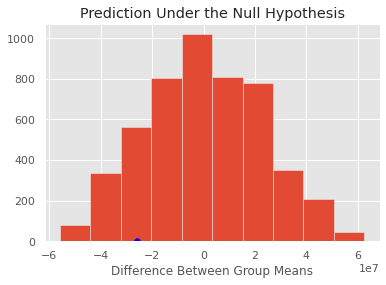

In [ ]:
plt.hist(differences)
plt.xlabel('Difference Between Group Means')
plt.title('Prediction Under the Null Hypothesis')
plt.scatter(observed_difference, 0, color='blue')
print('Observed Difference:', observed_difference)

### Government spending Park/Camp

In [ ]:
def difference_of_means(table,label, location):
    """Takes: name of table,
    column label that indicates the year
    Returns: Difference of mean government spending of the two years for that location"""
    reduced = table[[label, location]]
    means_table = reduced.groupby(label).mean()
    means = np.array(means_table.iloc[:,0])
    difference = means[1] - means[0]
    return difference


def one_simulated_difference_of_means(table, label, location):
    """Returns: Difference between mean government spending for the 2 years after shuffling labels
    (after shuffling year)"""
    x = np.array(table[label])
    np.random.shuffle(x)
    shuffled_table = table[[label, location]]
    shuffled_table[label] = x

    return difference_of_means(shuffled_table, label, location)   


differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Park / Camp')
    differences = np.append(differences, new_difference)  


observed_difference = difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Park / Camp')
empirical_p_2 = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p_2

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0888

Observed Difference: -57000000.0


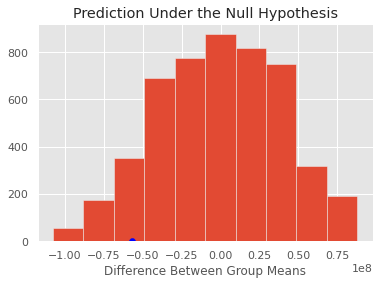

In [ ]:
plt.hist(differences)
plt.xlabel('Difference Between Group Means')
plt.title('Prediction Under the Null Hypothesis')
plt.scatter(observed_difference, 0, color='blue')
print('Observed Difference:', observed_difference)

### Government Spending Health Care

In [ ]:
def difference_of_means(table,label, location):
    """Takes: name of table,
    column label that indicates the year
    Returns: Difference of mean government spending of the two years for that location"""
    reduced = table[[label, location]]
    means_table = reduced.groupby(label).mean()
    means = np.array(means_table.iloc[:,0])
    difference = means[1] - means[0]
    return difference


def one_simulated_difference_of_means(table, label, location):
    """Returns: Difference between mean government spending for the 2 years after shuffling labels
    (after shuffling year)"""
    x = np.array(table[label])
    np.random.shuffle(x)
    shuffled_table = table[[label, location]]
    shuffled_table[label] = x

    return difference_of_means(shuffled_table, label, location)   


differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Health Care')
    differences = np.append(differences, new_difference)  


observed_difference = difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Health Care')
empirical_p_3 = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p_3

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.2892

Observed Difference: -12166666.666666687


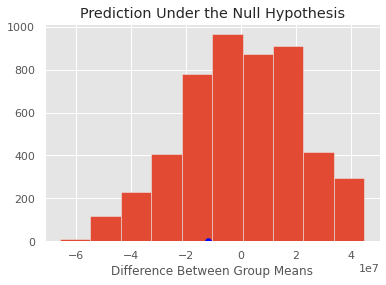

In [ ]:
plt.hist(differences)
plt.xlabel('Difference Between Group Means')
plt.title('Prediction Under the Null Hypothesis')
plt.scatter(observed_difference, 0, color='blue')
print('Observed Difference:', observed_difference)

# State and Local Government Construction Spending - Amusement and Recreation


In [ ]:
#Hypothesis 4

def difference_of_means(table,label, location):
    """Takes: name of table,
    column label that indicates the year
    Returns: Difference of mean government spending of the two years for that location"""
    reduced = table[[label, location]]
    means_table = reduced.groupby(label).mean()
    means = np.array(means_table.iloc[:,0])
    difference = means[1] - means[0]
    return difference


def one_simulated_difference_of_means(table, label, location):
    """Returns: Difference between mean government spending for the 2 years after shuffling labels
    (after shuffling year)"""
    x = np.array(table[label])
    np.random.shuffle(x)
    shuffled_table = table[[label, location]]
    shuffled_table[label] = x

    return difference_of_means(shuffled_table, label, location)   


differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Amusement and Recreation')
    differences = np.append(differences, new_difference)  


observed_difference = difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Amusement and Recreation')
empirical_p_4 = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p_4

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0856

Observed Difference: -128083333.33333337


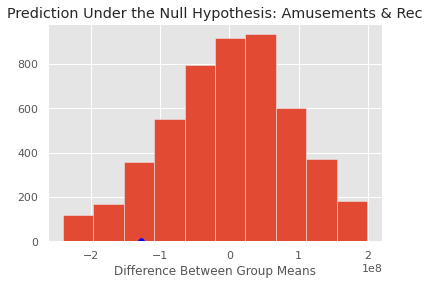

In [ ]:
plt.hist(differences)
plt.xlabel('Difference Between Group Means')
plt.title('Prediction Under the Null Hypothesis: Amusements & Rec')
plt.scatter(observed_difference, 0, color='blue')
print('Observed Difference:', observed_difference)

# State and Local Government Construction Spending - High School

In [ ]:
#Hypothesis test skeleton code

def difference_of_means(table,label, location):
    """Takes: name of table,
    column label that indicates the year
    Returns: Difference of mean government spending of the two years for that location"""
    reduced = table[[label, location]]
    means_table = reduced.groupby(label).mean()
    means = np.array(means_table.iloc[:,0])
    difference = means[1] - means[0]
    return difference


def one_simulated_difference_of_means(table, label, location):
    """Returns: Difference between mean government spending for the 2 years after shuffling labels
    (after shuffling year)"""
    x = np.array(table[label])
    np.random.shuffle(x)
    shuffled_table = table[[label, location]]
    shuffled_table[label] = x

    return difference_of_means(shuffled_table, label, location)   


differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means(spending,'Date', 'State and Local Government Construction Spending - High School')
    differences = np.append(differences, new_difference)  


observed_difference = difference_of_means(spending,'Date', 'State and Local Government Construction Spending - High School')
empirical_p_5 = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p_5

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.158

Observed Difference: -354666666.66666675


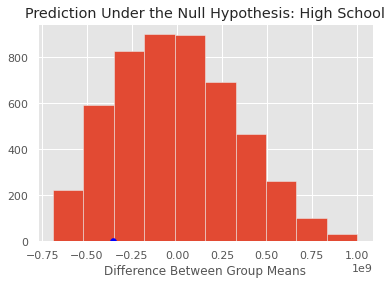

In [ ]:
plt.hist(differences)
plt.xlabel('Difference Between Group Means')
plt.title('Prediction Under the Null Hypothesis: High School')
plt.scatter(observed_difference, 0, color='blue')
print('Observed Difference:', observed_difference)

# State and Local Government Construction Spending - Higher Education

In [ ]:
#Hypothesis test skeleton code

def difference_of_means(table,label, location):
    """Takes: name of table,
    column label that indicates the year
    Returns: Difference of mean government spending of the two years for that location"""
    reduced = table[[label, location]]
    means_table = reduced.groupby(label).mean()
    means = np.array(means_table.iloc[:,0])
    difference = means[1] - means[0]
    return difference


def one_simulated_difference_of_means(table, label, location):
    """Returns: Difference between mean government spending for the 2 years after shuffling labels
    (after shuffling year)"""
    x = np.array(table[label])
    np.random.shuffle(x)
    shuffled_table = table[[label, location]]
    shuffled_table[label] = x

    return difference_of_means(shuffled_table, label, location)   


differences = []

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Higher Education')
    differences = np.append(differences, new_difference)  


observed_difference = difference_of_means(spending,'Date', 'State and Local Government Construction Spending - Higher Education')
empirical_p_6 = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p_6

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0904

Observed Difference: -189916666.66666675


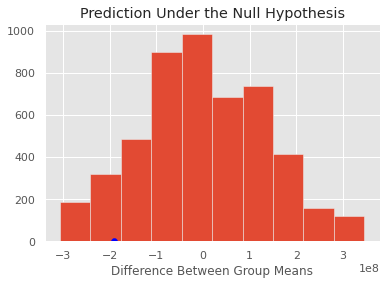

In [ ]:
plt.hist(differences)
plt.xlabel('Difference Between Group Means')
plt.title('Prediction Under the Null Hypothesis')
plt.scatter(observed_difference, 0, color='blue')
print('Observed Difference:', observed_difference)

## Empirical p values for the 6 hypothesis tests

In [ ]:
#Empirical p values 
emp_pvals = np.array((empirical_p,empirical_p_2, empirical_p_3, empirical_p_4, empirical_p_5, empirical_p_6))
emp_pvals

array([0.1338, 0.0888, 0.2892, 0.0856, 0.158 , 0.0904])

In [ ]:
#Bonferroni Correction for empirical p values: 
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.
    
    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    threshold = alpha_total / len(p_values)
    decisions = p_values <= threshold # TODO: fill in
    return decisions

bonferroni(emp_pvals, 0.2)

array([False, False, False, False, False, False])

In [ ]:
#Benjamini Hochberg for empirical p values: 
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    y = np.sort(p_values)
    z = [i for i in range(len(p_values)) if y[i] <= (i + 1)*(alpha/len(p_values))]
                
    if len(z) == 0:
        decisions = np.ones(len(y)) < 0
    else:
        max_z = max(z)
        threshold = y[max_z]
        decisions = p_values <= threshold 
                
    return decisions

benjamini_hochberg(emp_pvals, .2)

array([ True,  True, False,  True,  True,  True])

## Results: 
We fail to reject the null for all 6 hypothesis tests with the Bonferroni Correction. 
For the Benjamini Hochberg correction, we reject the null for all hypothesis tests except the third one, which is government spending for health care. 


#False: accepting the null
#True: rejecting the null 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b973bf52-720f-4f08-a354-6907a41c78da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>